# House Price Prediction

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## (1) Problem Statement
Develop a machine learning model to accurately predict house prices in King County, USA, using various property features to better understand the factors influencing real estate values.

## (2) Data Collection
* Data Source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
* This dataset contain 21613 records and 21 features.

### (2.1) Import Data and Relevant Libraries/Packages

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# dataset shape
df.shape

(21613, 21)

## (3) Data Checks to perform

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# any null values in dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# statistics of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# checking number of unique values in each columns
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
# checking duplicate values in dataset
df.duplicated().sum()

0

In [8]:
# checking categotical data and numerical data
cat_data = df.select_dtypes(include=['object'])
num_data = df.select_dtypes(exclude=['object'])

print(f'Categorical Features: {cat_data.shape[1]} features')
print(f'Numerical Features: {num_data.shape[1]} features')

Categorical Features: 1 features
Numerical Features: 20 features


### Conclusions (Dataset Exploration)
* Dataset contain 21613 records (no duplicate) and 21 features (columns).
* No null values present in dataset.
* Columns ['sqft_living','sqft_above','sqft_basement','yr_renovated','sqft_living15'] has too large standard deviation.
* Most of the columns contain unique values in it.
* Their are 20 numerical features and only 1 categorical feature.

## (4) Exploratory Data Analysis (Visualization)

Text(0.5, 1.0, 'Distribution of the Price Feature (Target Variable)')

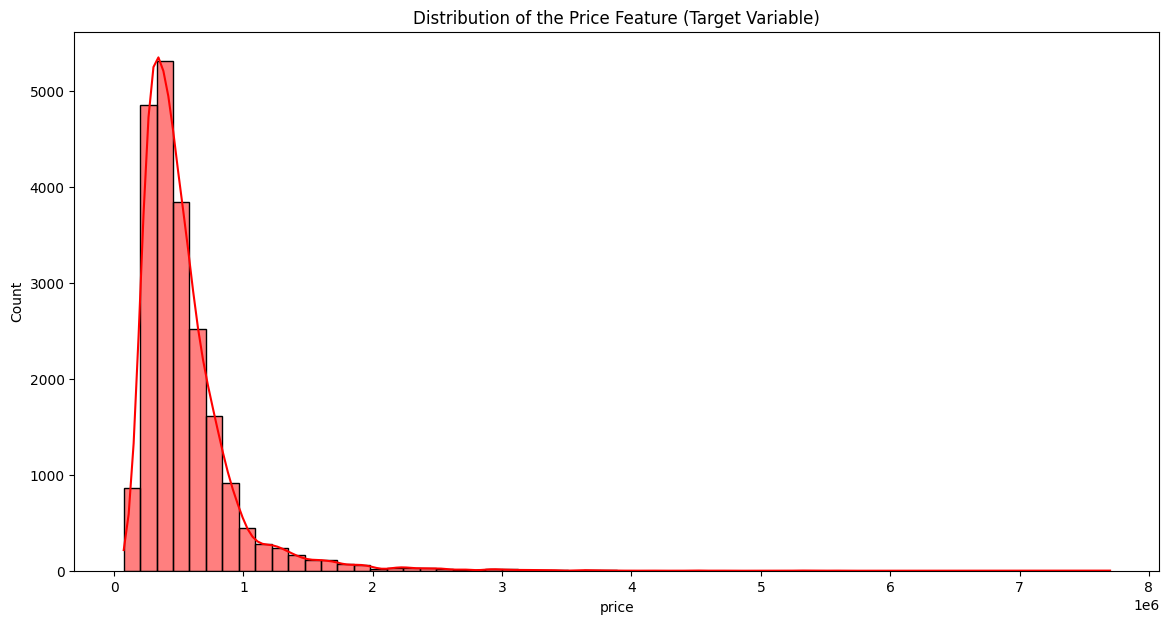

In [9]:
# distribution of price (target variable) feature
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='price', color='r', bins=60, kde=True)
plt.title("Distribution of the Price Feature (Target Variable)")

Note: '1e6' represent the value of 1000000 (1 Million). And, price of the houses are in dollars.

In [10]:
# top 5 most expensive houses
df.nlargest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [11]:
# top 5 cheapest houses
df.nsmallest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


Text(0.5, 1.0, 'Distribution of the Bedrooms Feature')

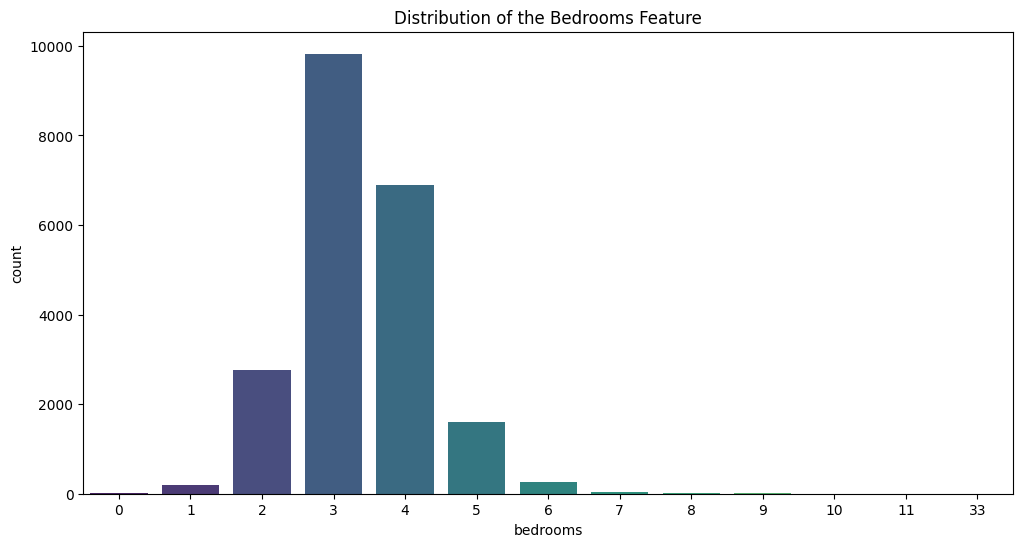

In [12]:
# distribution of the number of bedrooms
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bedrooms', palette='viridis')
plt.title("Distribution of the Bedrooms Feature")


Conclusion: Most of the houses have bedrooms between range 2 to 4 (including).

Text(0.5, 1.0, 'Distribution of the Bathrooms Feature')

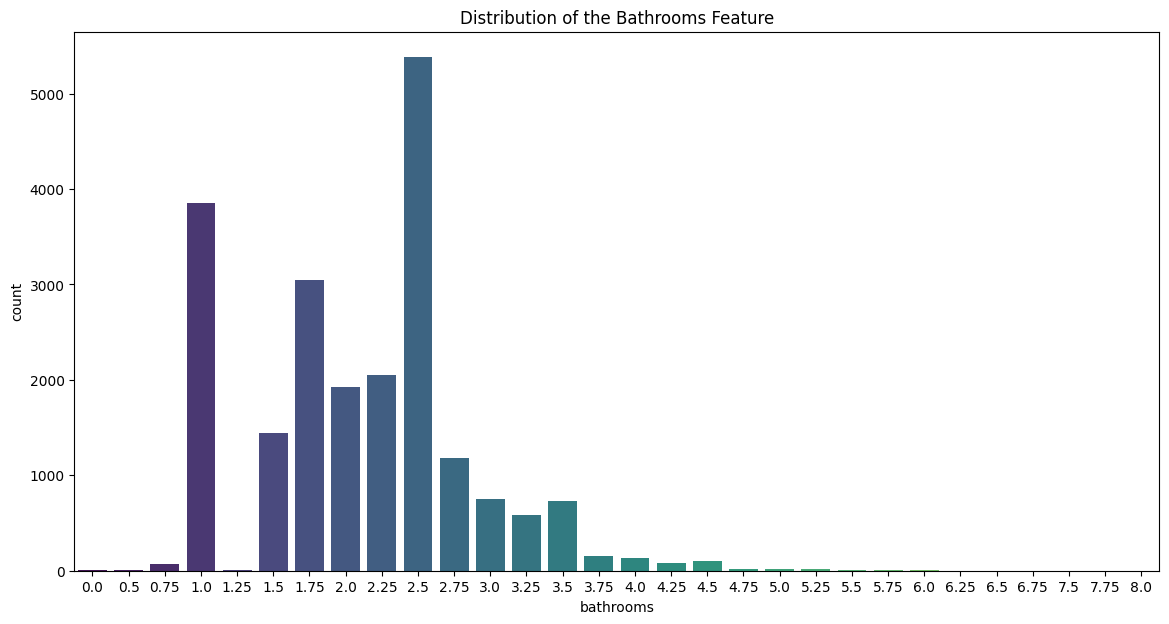

In [13]:
# distribution of the number of bathrooms
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='bathrooms', palette='viridis')
plt.title("Distribution of the Bathrooms Feature")

Conclusion: Bathroom feature is in float type. It must be in integer. Because, it is obvious that house has bathroom in int quantity not in float or decimal. We need to do feature engineering for that.

Text(0.5, 1.0, 'Distribution of the Floors Feature')

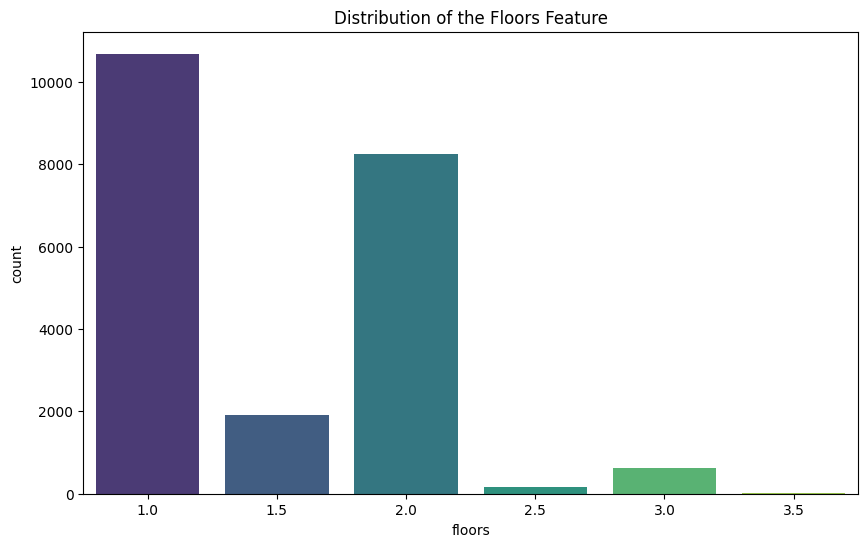

In [14]:
# distribution of the number of floors
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='floors', palette='viridis')
plt.title("Distribution of the Floors Feature")

Conclusion: Most of the houses have 1 or 2 floors.

Text(0.5, 1.0, 'Distribution of "Square Foot of Lot"')

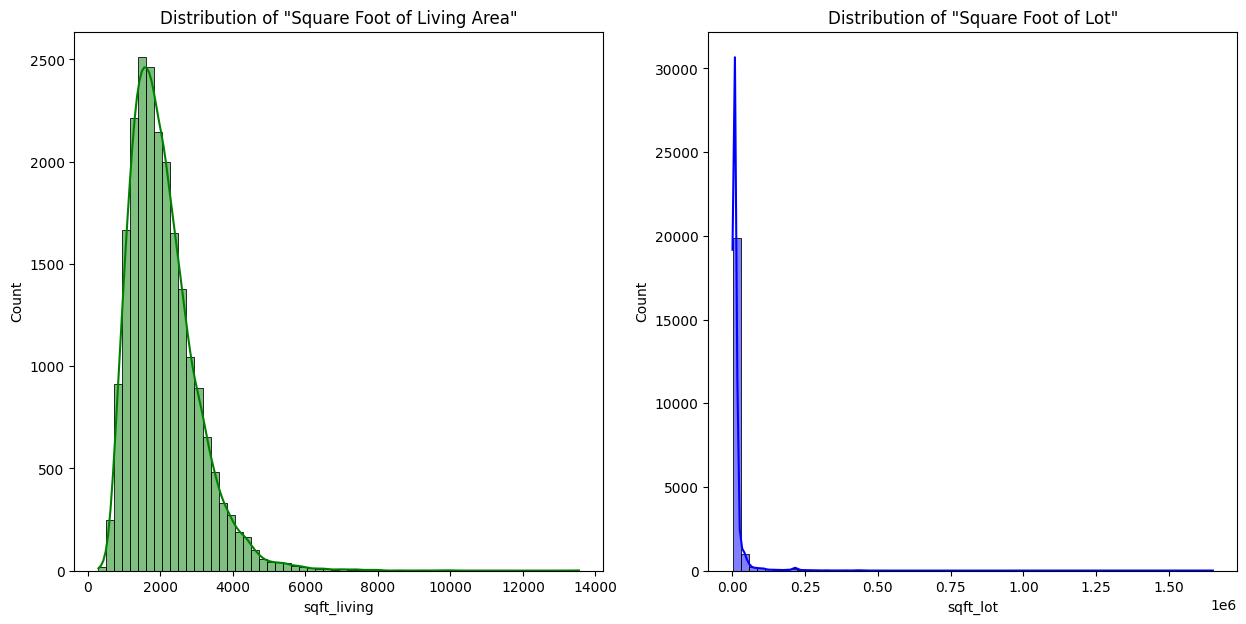

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='sqft_living',bins=60,kde=True,color='g')
plt.title('Distribution of "Square Foot of Living Area"')
plt.subplot(122)
sns.histplot(data=df,x='sqft_lot',bins=60,kde=True,color='b')
plt.title('Distribution of "Square Foot of Lot"')

Text(0.5, 1.0, 'Distribution of "Square footage of the basement"')

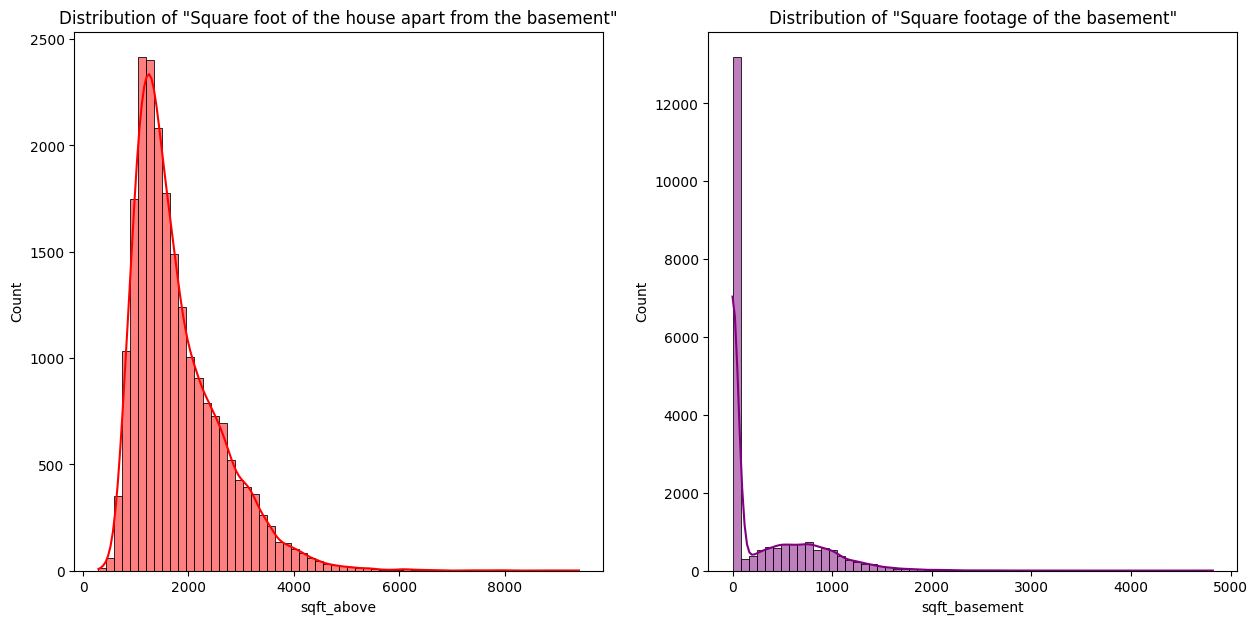

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='sqft_above',bins=60,kde=True,color='r')
plt.title('Distribution of "Square foot of the house apart from the basement"')
plt.subplot(122)
sns.histplot(data=df,x='sqft_basement',bins=60,kde=True,color='purple')
plt.title('Distribution of "Square footage of the basement"')

Text(0.5, 1.0, 'Distribution of sqft_lot15')

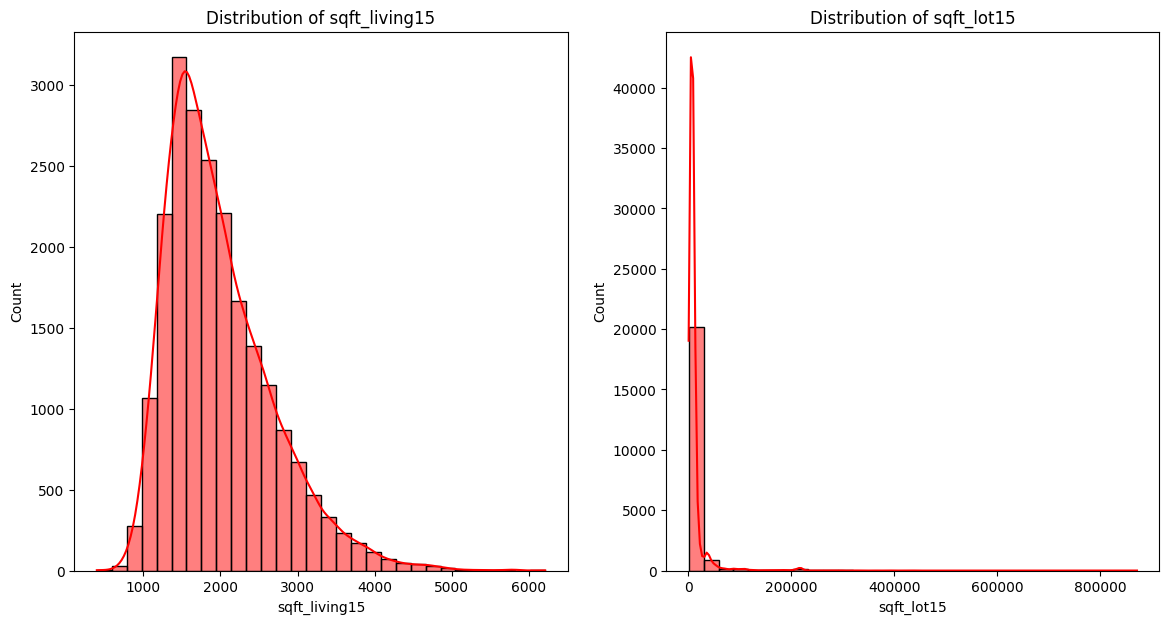

In [17]:
# distribution for features "sqft_living15" and "sqft_lot15"
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(df,x='sqft_living15', kde=True, color='r', bins=30)
plt.title('Distribution of sqft_living15')
plt.subplot(1,2,2)
sns.histplot(df,x='sqft_lot15', kde=True, color='r', bins=30)
plt.title('Distribution of sqft_lot15')

About Features: The features sqft_living15 and sqft_lot15 are defined as follows:
* sqft_living15: The living space area (in square feet) of the nearest 15 neighbors.
* sqft_lot15: The lot size (in square feet) of the nearest 15 neighbors.

---

These features provide information about the average size of neighboring homes and lots, which can be useful for understanding the property's context within its neighborhood and how it compares to nearby properties.

Text(0.5, 1.0, 'Number of houses with waterfront')

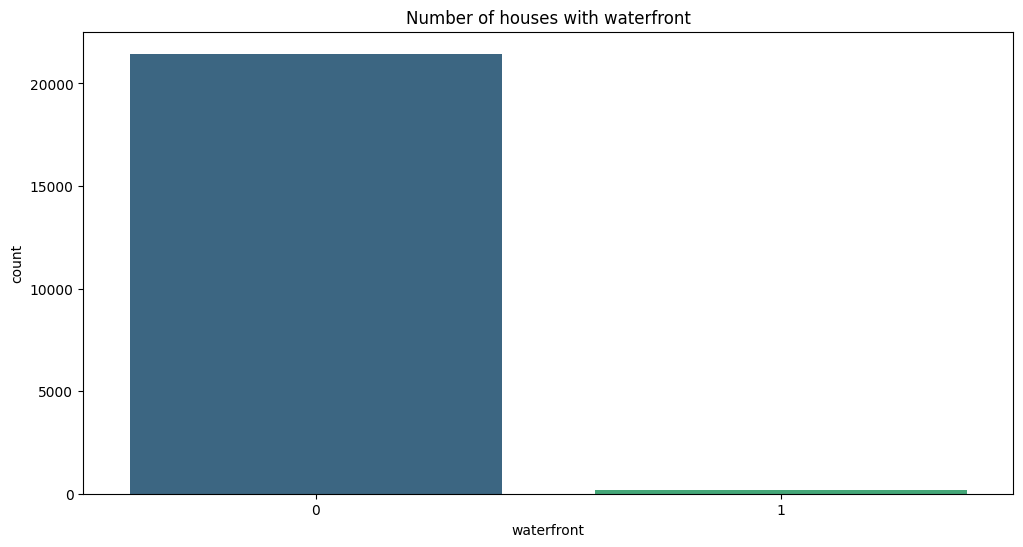

In [18]:
# countplot for the number of houses with waterfront
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='waterfront', palette='viridis')
plt.title('Number of houses with waterfront')

Conclusion: Most of the houses don't have waterfront.

Text(0.5, 1.0, 'Number of houses with condition')

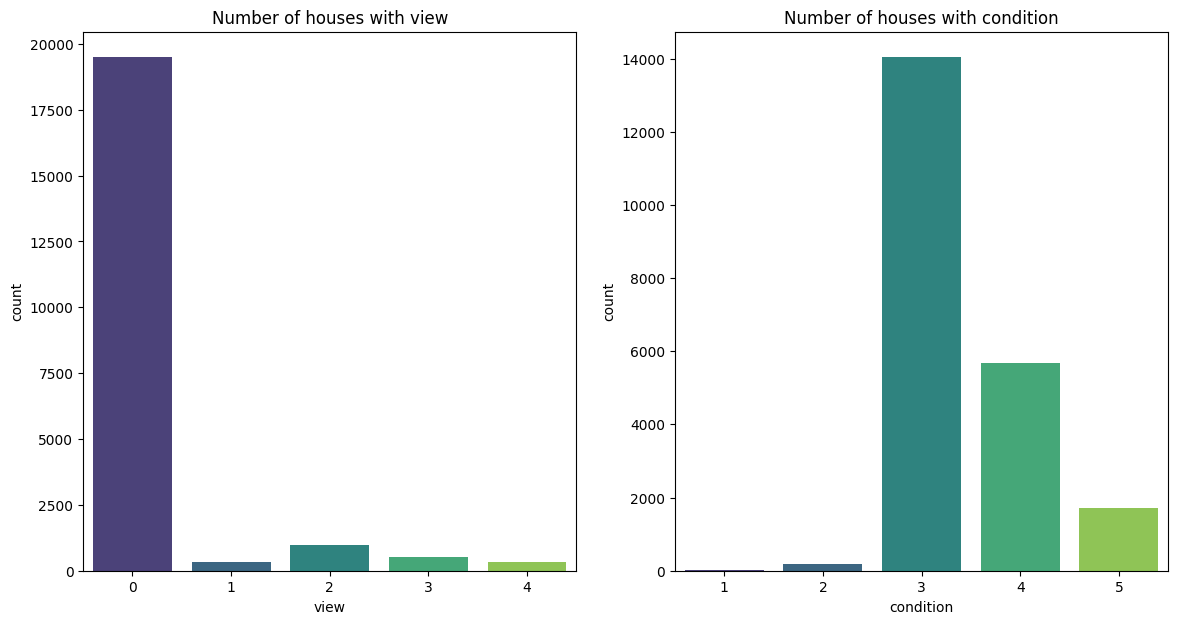

In [19]:
# subplot for view and condition
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='view', palette='viridis')
plt.title('Number of houses with view')
plt.subplot(1,2,2)
sns.countplot(data=df, x='condition', palette='viridis')
plt.title('Number of houses with condition')

Conclusion: House don't have much good view and condition of the house is better than average.
- View: An index from 0 to 4 of how good the view of the property was.
- Condition: An index from 1 to 5 on the condition of the house.

Text(0.5, 1.0, 'Number of houses with grade')

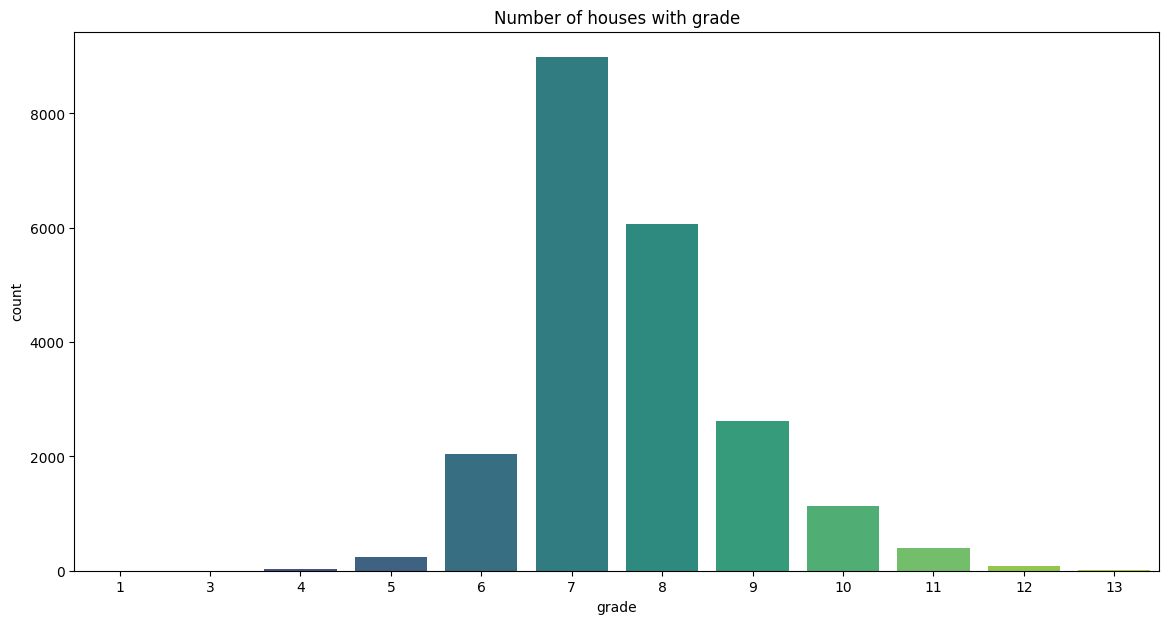

In [20]:
# countplot for the number of houses with grade
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='grade', palette='viridis')
plt.title('Number of houses with grade')

Conclusion: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

Text(0.5, 1.0, 'Price of houses over the years houses were built')

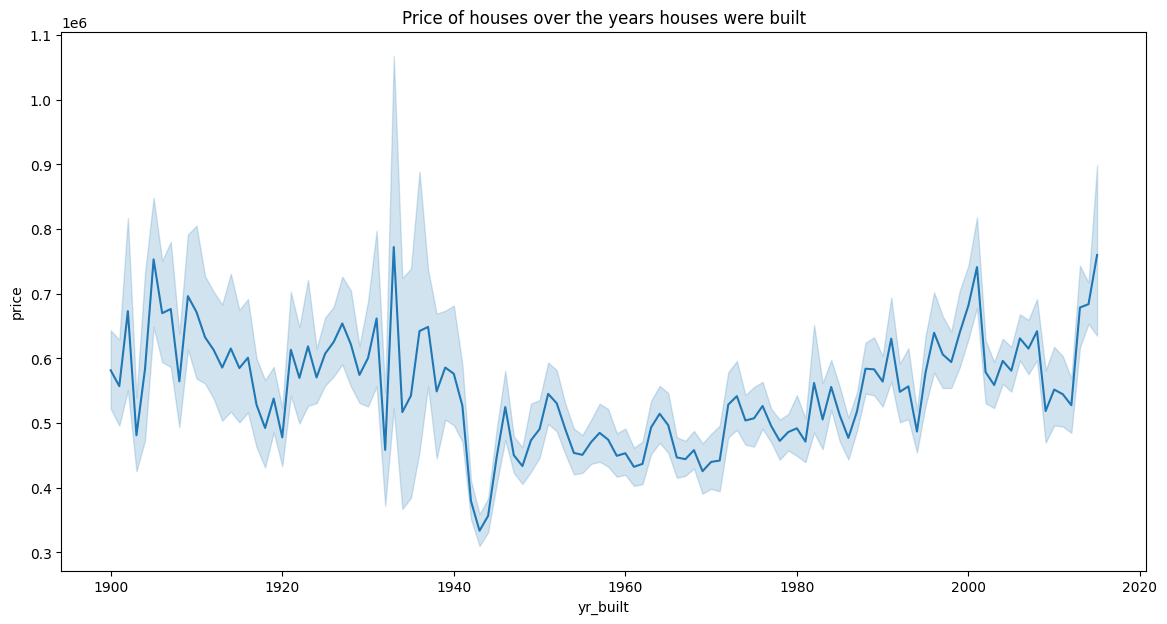

In [21]:
# line plot for year built and price
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='yr_built', y='price')
plt.title('Price of houses over the years houses were built')

Conclusion:
- Prices of the house between 1940 to 1980 is as compare to before 1940 and after 1980. And, prices decreased too much between 1940 to 1945, it might be because of "World War II".
- Prices are started increasing after 1980 in some kind of consistent manner.

Text(0.5, 1.0, 'Price of houses over the years houses were last renovated')

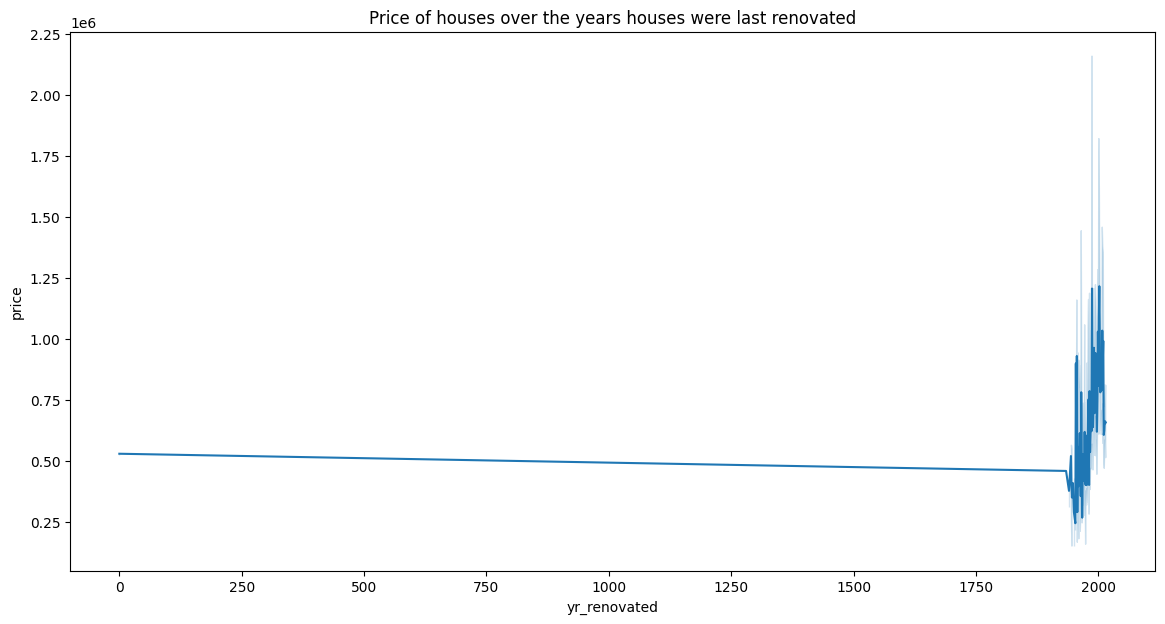

In [23]:
# line plot for year renovated and price
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were last renovated')

This don't help us anymore. Let's take a look between 1900 to 2015 (last year in dataset).

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

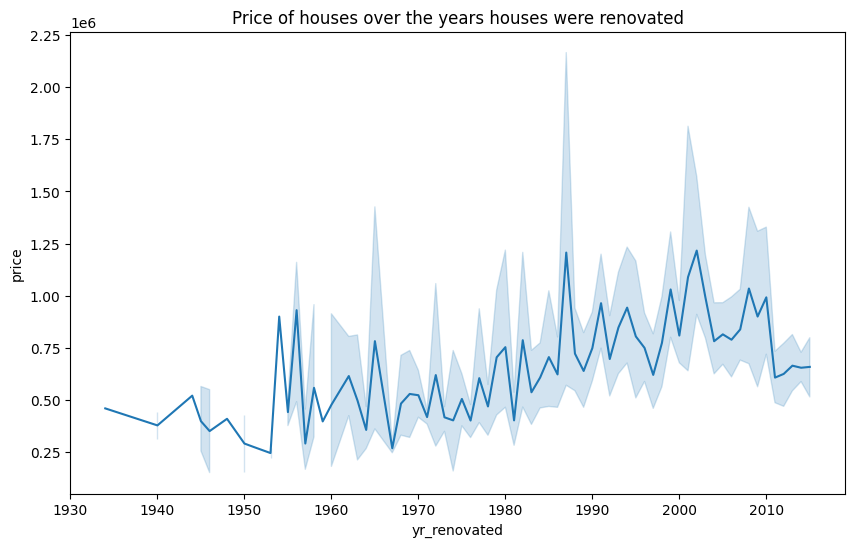

In [24]:
# line plot for year renovated and price between 1900 and 2000
# Assuming df is your DataFrame and it has been imported correctly
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

Conclusion: It seems like Prices of the houses which renovated after 1980 has high value.

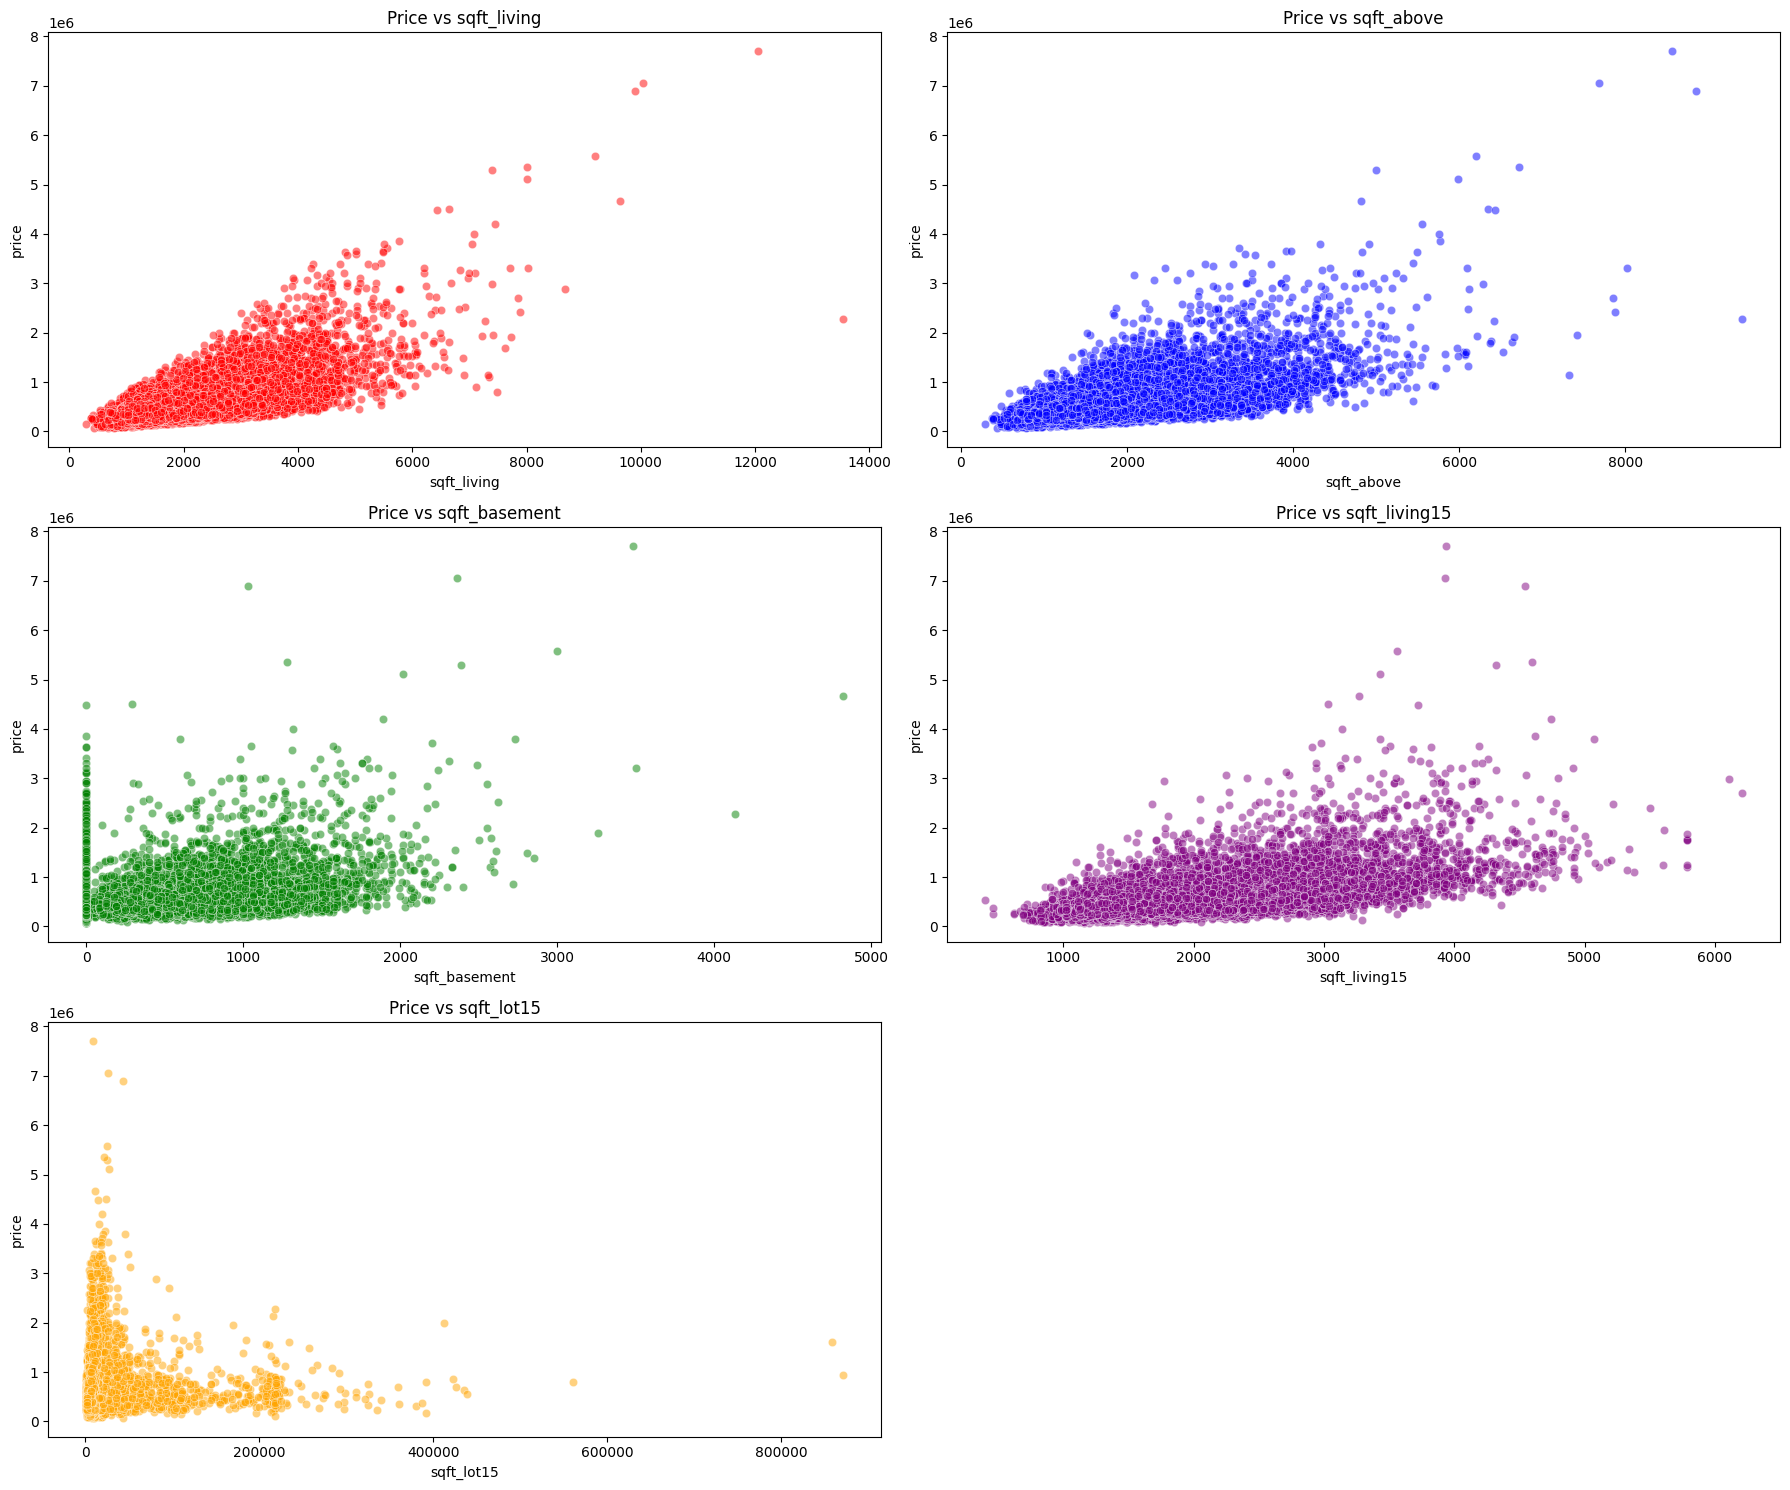

In [25]:
# subplot for scatter plots of price and sqft_living, sqft_above, sqft_basement, sqft_living15, sqft_lot15
plt.figure(figsize=(18,15))
plt.subplot(3,2,1)
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5, color='r')
plt.title('Price vs sqft_living')

plt.subplot(3,2,2)
sns.scatterplot(data=df, x='sqft_above', y='price', alpha=0.5, color='b')
plt.title('Price vs sqft_above')

plt.subplot(3,2,3)
sns.scatterplot(data=df, x='sqft_basement', y='price', alpha=0.5, color='g')
plt.title('Price vs sqft_basement')

plt.subplot(3,2,4)
sns.scatterplot(data=df, x='sqft_living15', y='price', alpha=0.5, color='purple')
plt.title('Price vs sqft_living15')

plt.subplot(3,2,5)
sns.scatterplot(data=df, x='sqft_lot15', y='price', alpha=0.5, color='orange')
plt.title('Price vs sqft_lot15')

plt.tight_layout()

Text(0.5, 1.0, 'Latitude and Longitude (Coordinates) of the houses / Map of King County')

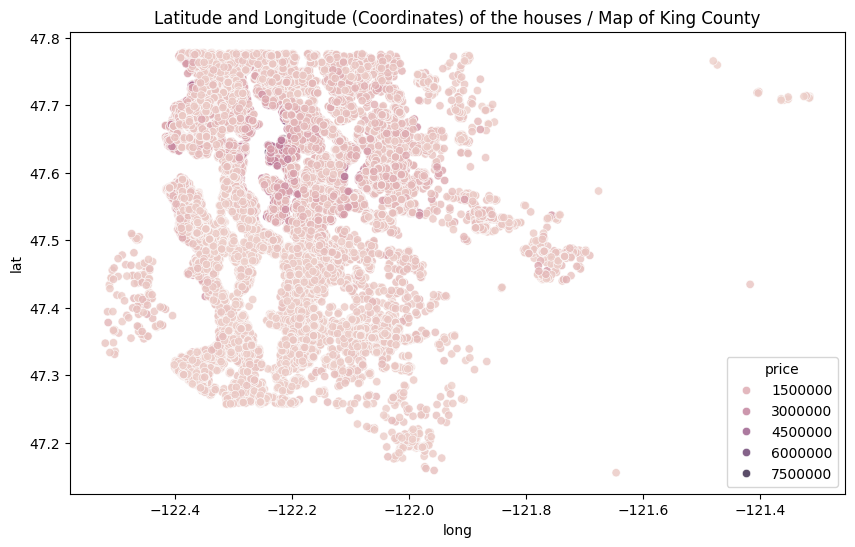

In [26]:
# latitude and longitude of the houses
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='long', y='lat', hue='price',alpha=0.8)
plt.title("Latitude and Longitude (Coordinates) of the houses / Map of King County")

Text(0.5, 1.0, 'Map of King County')

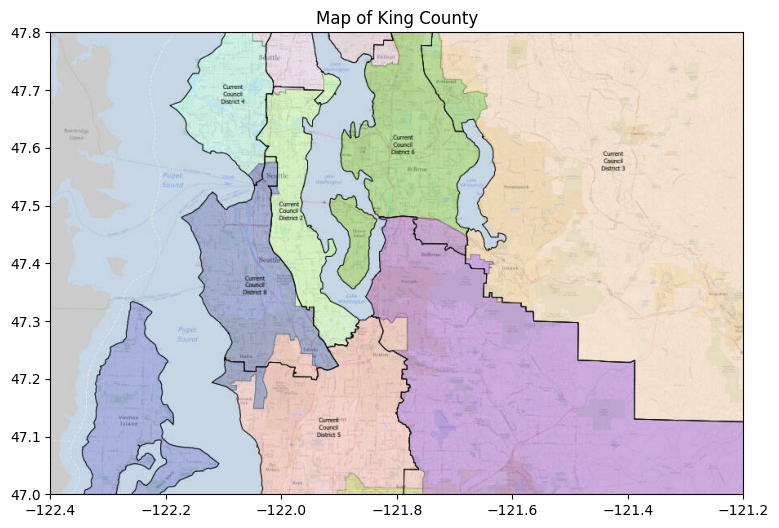

In [29]:
# actual map (image) of King County
plt.figure(figsize=(10,6))
img = plt.imread("data/king_country.jpg")
plt.imshow(img, extent=[-122.4, -121.2, 47, 47.8])
plt.xlim(-122.4, -121.2)
plt.ylim(47, 47.8)
plt.title('Map of King County')

Text(0.5, 1.0, 'Heatmap of the correlation between the features')

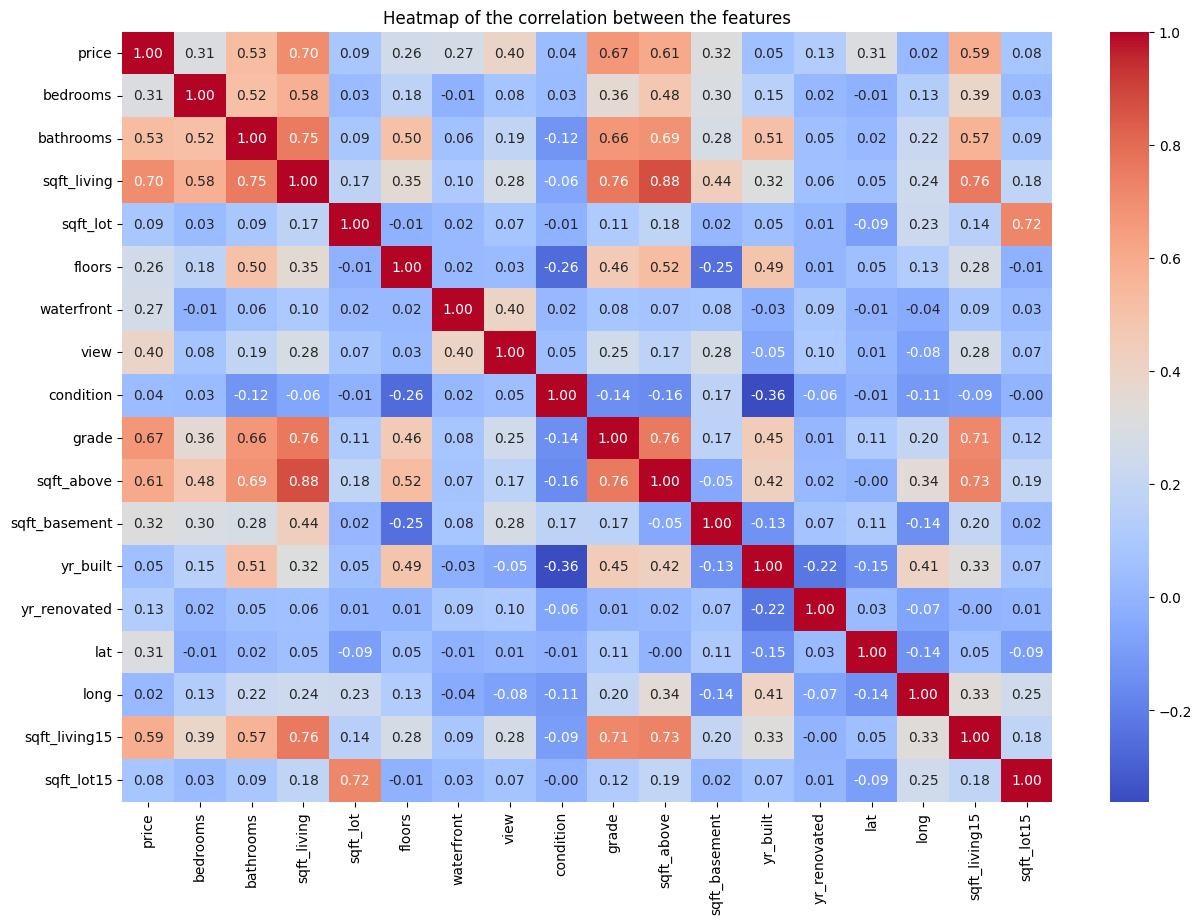

In [30]:
# heatmap of the correlation between the features excluding the id and zipcode column
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['id', 'zipcode', 'date'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the correlation between the features')

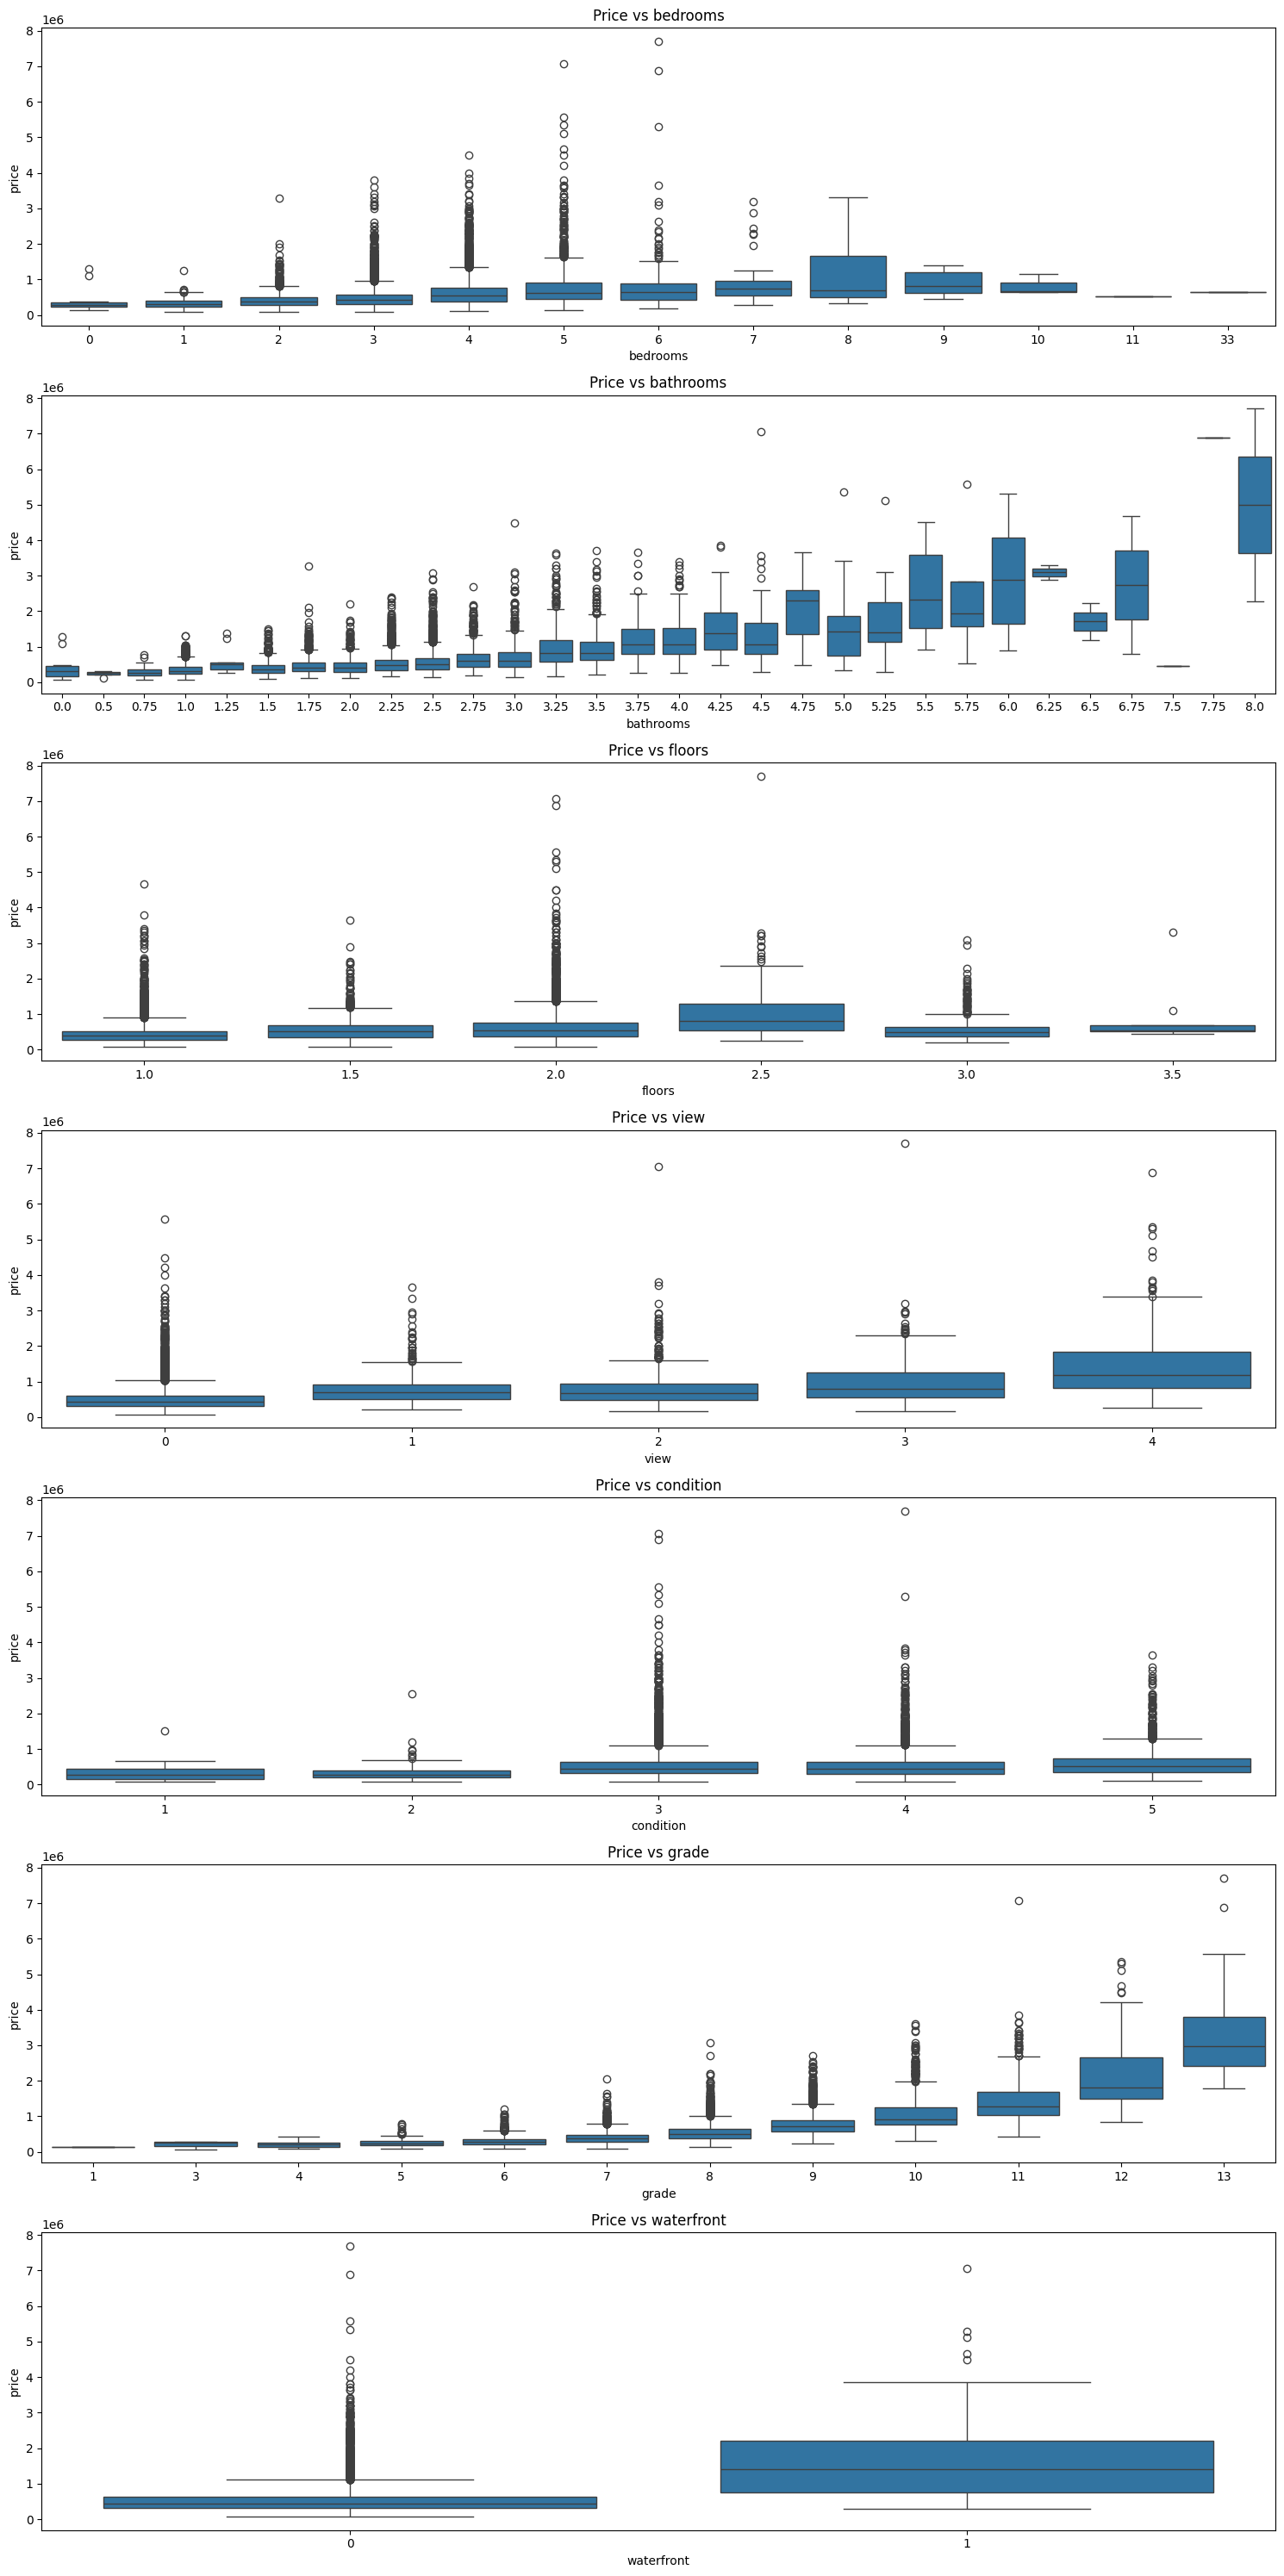

In [31]:
# boxplot for the price and the number of bedrooms, bathrooms, floors, view, condition, grade
plt.figure(figsize=(15,30))
plt.subplot(7,1,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price vs bedrooms')

plt.subplot(7,1,2)
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('Price vs bathrooms')

plt.subplot(7,1,3)
sns.boxplot(data=df, x='floors', y='price')
plt.title('Price vs floors')

plt.subplot(7,1,4)
sns.boxplot(data=df, x='view', y='price')
plt.title('Price vs view')

plt.subplot(7,1,5)
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price vs condition')

plt.subplot(7,1,6)
sns.boxplot(data=df, x='grade', y='price')
plt.title('Price vs grade')

plt.subplot(7,1,7)
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price vs waterfront')


plt.tight_layout()

Text(0.5, 1.0, 'Price vs sqft_living hue by waterfront')

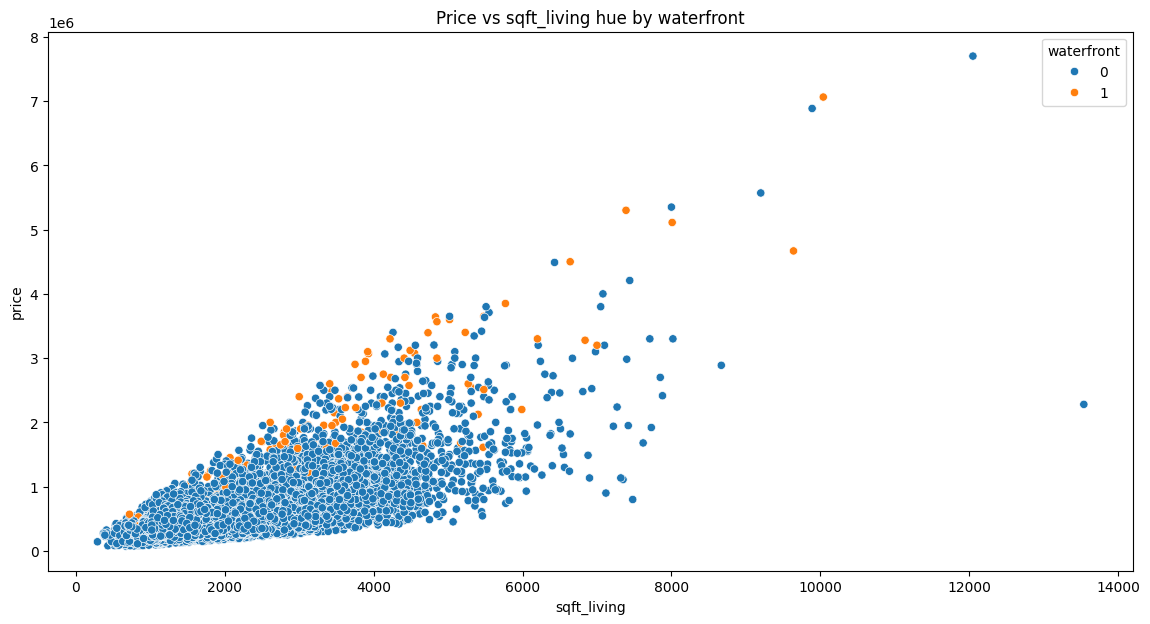

In [32]:
# scatter plot for the price and the sqft_living hue by the waterfront
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='waterfront')
plt.title('Price vs sqft_living hue by waterfront')

## (4) Data Pre-processing

In [33]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### (4.1) Remove Irrelevant Features/Columns

In [34]:
# Column id is not useful for our machine learning model. So, we remove it from dataframe
df = df.drop('id', axis=1)

In [35]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

Zipcode column have lot's of unique values and in numeric type, it might give wrong information to our model and mislead the prediction. Now, let's check the correlation with target feature.

In [36]:
# Let's check the correlation of 'zipcode' column with target feature
correlation = df['zipcode'].corr(df['price'])
print(f"The correlation between zipcode and price is: {correlation}")

The correlation between zipcode and price is: -0.05320285429832562


Conclusion: Column 'zipcode' don't have good coorelation with target feature 'price'. Remove it from dataframe.

In [37]:
df = df.drop('zipcode', axis=1)

### (4.2) Feature Engineeering

In [38]:
# feature engineer date column, extract year and month for separate new feature
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [39]:
# check the dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Text(0.5, 1.0, 'Price of houses over the time')

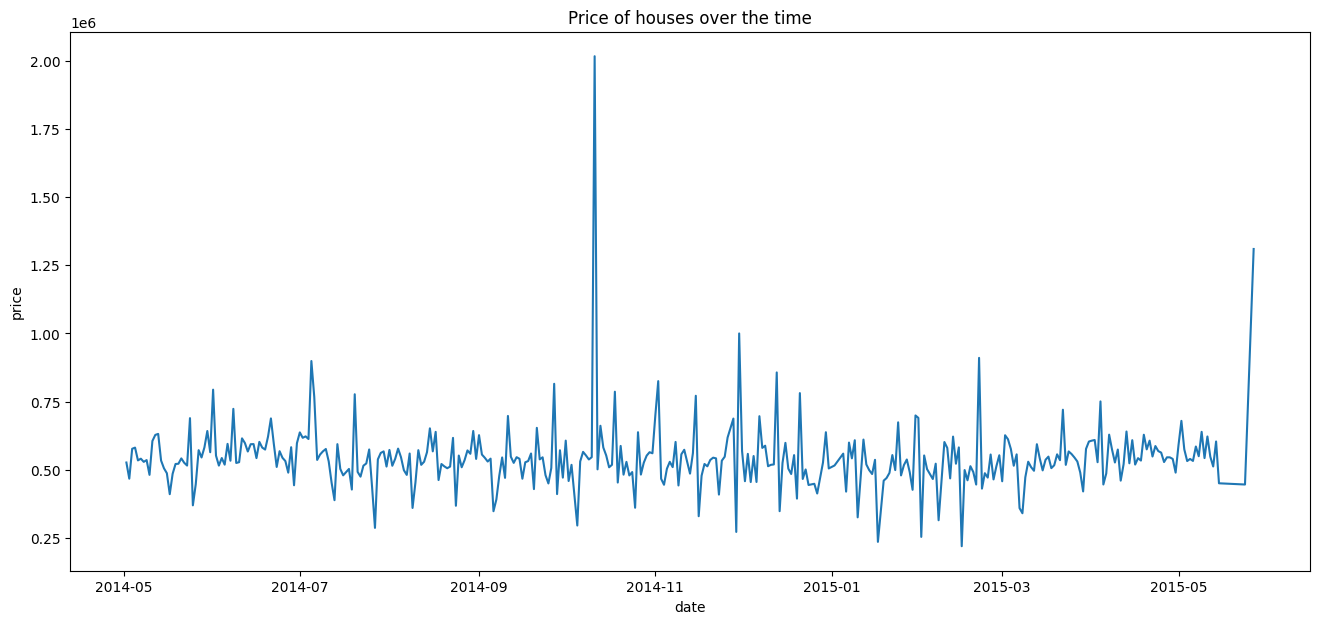

In [40]:
# lineplot for date vs price
plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='date', y='price', ci=None)
plt.title('Price of houses over the time')

Text(0.5, 1.0, 'Price of houses over the years')

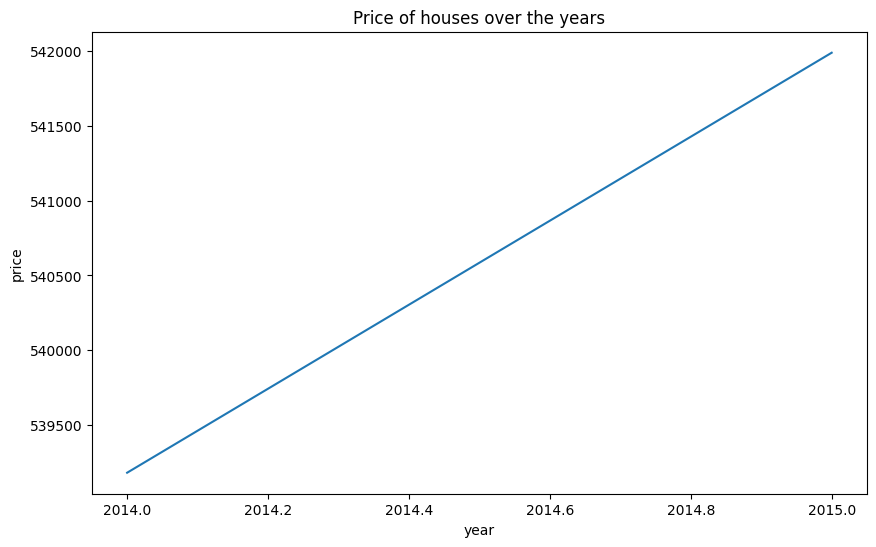

In [41]:
# lineplot for the price and the year
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='price', ci=None)
plt.title('Price of houses over the years')

Text(0.5, 1.0, 'Price of houses over the month')

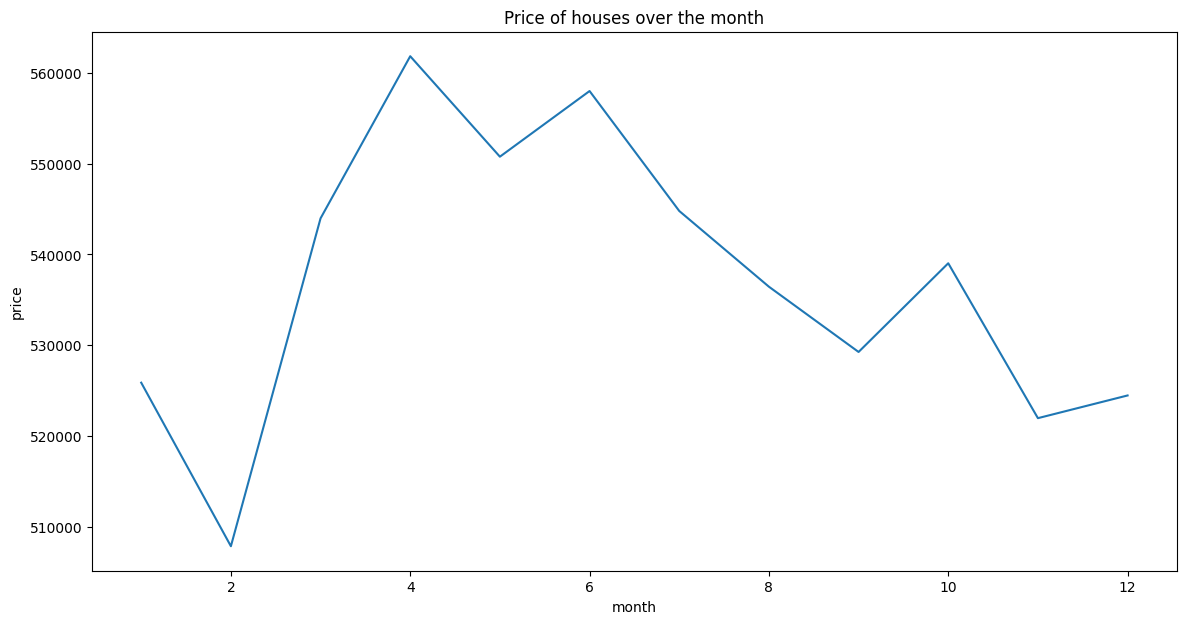

In [42]:
# lineplot for the price and the month
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='month', y='price', ci=None)
plt.title("Price of houses over the month")

Conclusion: Price is decreased during the period of 2014, from 4th (April) month to 9th (September) month.

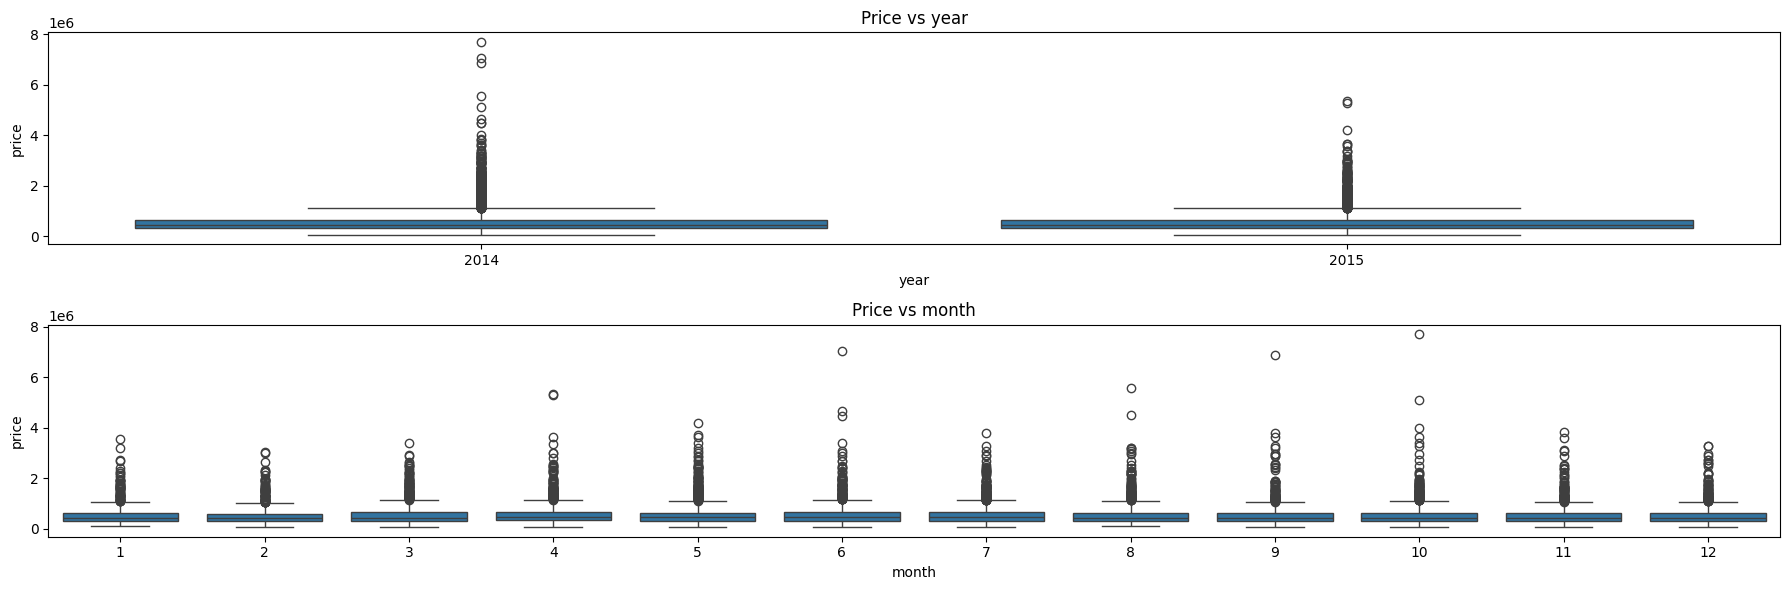

In [43]:
# boxplot for price and year, month
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='year', y='price')
plt.title("Price vs year")

plt.subplot(2,1,2)
sns.boxplot(data=df, x='month', y='price')
plt.title("Price vs month")

plt.tight_layout()

In [44]:
# drop date column
df = df.drop('date', axis=1)

In [45]:
# feature engineering the year column
df['house_age'] = df['year'] - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28


In [46]:
# save the cleaned data
df.to_csv('data/processed_data.csv', index=False)